KNN : 최근접이웃

iris dataset

iris_feature_names

Sepal Length : 꽃 받침 길이
Sepal Width : 꽃 받침 너비
Petal Length : 꽃잎 길이
Petal Width : 꽃잎 너비

꽃받침 길이, 너비 두가지 feature를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류

neighbors.KNeighborClassifier(n_neighbors, weight-weights)

weights : 
  uniform : uniform weights : 모든 neighbor의 가중치를 동일하게 취급
  distance : neighbor의 거리에 반비례하여 가중치 조정

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

In [5]:
##sort 가 안되어있음 그러므로 데이터를 항상 꼭 확인해야함 (target)

iris.data.shape

(150, 4)

In [7]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [8]:
X = iris.data[:, :2]
Y = iris.target
X.shape, Y.shape

((150, 2), (150,))

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 2), (30, 2), (120,), (30,))

KNN object 생성 및 train

In [12]:
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

In [14]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [16]:
Y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

예측의 정확도 평가

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.6666666666666666

In [24]:
X_train[Y_train == 0]

array([[5.2, 3.5],
       [5.7, 3.8],
       [4.7, 3.2],
       [5. , 3.5],
       [5.4, 3.7],
       [4.8, 3.1],
       [5.3, 3.7],
       [4.3, 3. ],
       [5.4, 3.4],
       [5.7, 4.4],
       [4.6, 3.1],
       [4.6, 3.4],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.8, 3.4],
       [4.5, 2.3],
       [4.9, 3. ],
       [4.4, 3.2],
       [5. , 3.6],
       [5.1, 3.5],
       [4.4, 3. ],
       [5.4, 3.9],
       [5.1, 3.5],
       [4.9, 3.1],
       [5.2, 3.4],
       [5. , 3.2],
       [5.1, 3.3],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.8, 4. ],
       [5.1, 3.8],
       [4.7, 3.2],
       [5. , 3.3],
       [5. , 3. ],
       [5.1, 3.4],
       [5.5, 3.5],
       [5.1, 3.7],
       [4.9, 3.1],
       [4.6, 3.2]])

In [21]:
import matplotlib.pyplot as plt

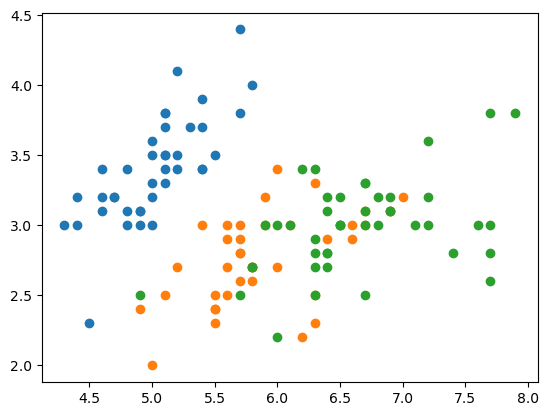

In [31]:
plt.scatter(X_train[Y_train == 0,0], X_train[Y_train == 0,1])
plt.scatter(X_train[Y_train == 1,0], X_train[Y_train == 1,1])
plt.scatter(X_train[Y_train == 2,0], X_train[Y_train == 2,1])

array([1])

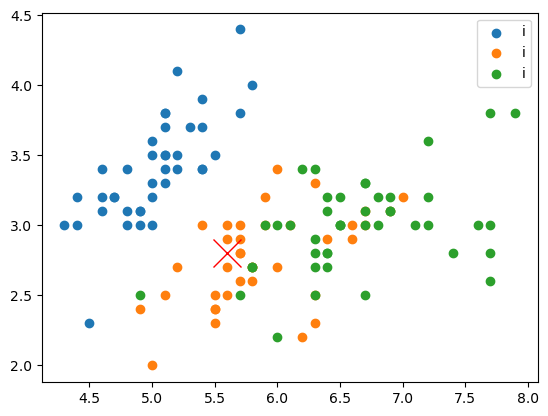

In [41]:
##위의 내용을 for문으로 돌리면 훨씬 간단하게 할 수 있다


for i in range(3):
    plt.scatter(X_train[Y_train == i,0], X_train[Y_train == i,1], label="i")

plt.plot(X_test[20, 0],X_test[20, 1], c='r', marker='x', markersize=20)

plt.legend()

clf.predict(X_test[20:21])

In [42]:
Y_train[20]

1

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  5,  8],
       [ 0,  2,  4]])

Text(0.5, 14.722222222222216, 'Predicted')

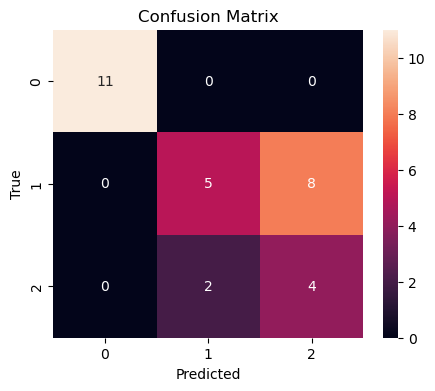

In [48]:
#seaborn은 matplotlib을 매우 쉽게 그려주는 것

import seaborn as sns

plt.figure(figsize=(5,4))
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_title('Confusion Matrix')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')